In [8]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import tensorflow as tf
from keras.utils import np_utils

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Feed Forward Neural Network

## Build a neural network with 5 layers and 10 neurons for each layer. Use a ReLU activation for all inner layers. Initialize all weights with uniformly distributed values and all biases with ones. Feed it some sample data and look at the results. Print a summary of your model with its layers and the number of trainable parameters.

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(10,), activation='relu', kernel_initializer='random_uniform',
                          bias_initializer='ones'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 550
Trainable params: 550
Non-trainable params: 0
_________________________________________________________________
None


The number of parameters is 550 because with every hidden layer we have 10 input weights and one weight of connection with bias.
This means that every hidden unit gives us 11 parameters. We have 5 layers so it sums up to 550.

## In order to train our model, put together a synthetic training data set. The examples have ten numerical features. Each feature of the examples is drawn randomly from a uniform distribution with a minimum value of -2 and a maximum value of 4. The dataset contains 15000 examples for training and 1000 for testing.


In [6]:
np.random.seed(42)
data = np.random.uniform(-2, 4, size=(16000, 10))

## Label the training data according to the following rule: The label for each example is the third lowest feature value unless this value is smaller than 0.5. In this case the label is the third lowest value divided by two.

In [9]:
labels = np.array([np.partition(row, 2)[2] if np.partition(row, 2)[2] >= 0.5 else (np.partition(row, 2)[2])/2 for row in data])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, labels, test_size=1000, random_state=123)

## Setup a training loop by
## • Preparing the created model to output data that fits the shape of the label data
## • Using the Adam optimizer
## • Using a suitable training loss 
## • Using a suitable training metric

In [10]:
model.compile(loss='mean_squared_error', metrics=['mae', 'mape'], optimizer='adam')

This is a problem where we predict a real-valued quantity -> loss function: Mean Squared Error (MSE). For the same reason I chose MAE and MAPE for metric.

## Train your model with a batch size of 32 for 10 epochs and visualize the aggregated training statistics for each epoch in multiple plots, i.e., a plot of your training loss and one of your training metric.


Epoch 1/10
469/469 [==============================] - 2s 2ms/step - loss: 0.2687 - mae: 0.4144 - mape: 182.6173 - val_loss: 0.2776 - val_mae: 0.4117 - val_mape: 108.2313
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2516 - mae: 0.4022 - mape: 169.6890 - val_loss: 0.2756 - val_mae: 0.4114 - val_mape: 116.7958
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2515 - mae: 0.4019 - mape: 168.1377 - val_loss: 0.2769 - val_mae: 0.4111 - val_mape: 108.8796
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2514 - mae: 0.4020 - mape: 177.3071 - val_loss: 0.2762 - val_mae: 0.4109 - val_mape: 109.7340
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2507 - mae: 0.4015 - mape: 173.2178 - val_loss: 0.2750 - val_mae: 0.4104 - val_mape: 118.9796
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2501 - mae: 0.4007 - mape: 181.7220 - val_loss: 0.2747 - val_mae: 0.4104 -

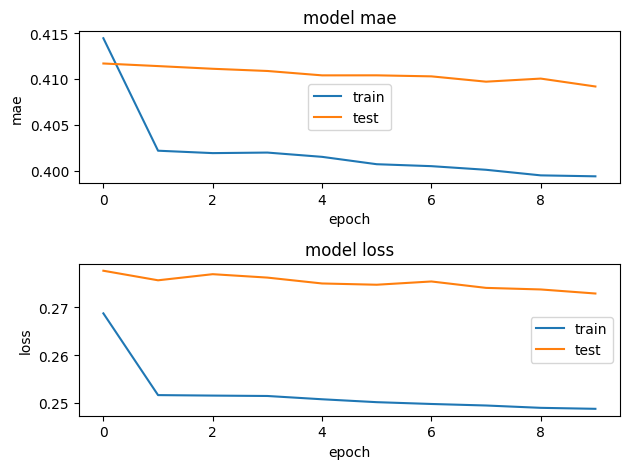

In [11]:
history = model.fit(X_train, y_train,
            epochs= 10,
            batch_size=32,
            validation_data=(X_test, y_test))

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

plt.tight_layout()
plt.show()

## Optimizing Neural Network Training

## Load the MNIST dataset via the respective built-in function of Keras. Scale the data to the range [0,1]. Visualize a few of the digits with its label.

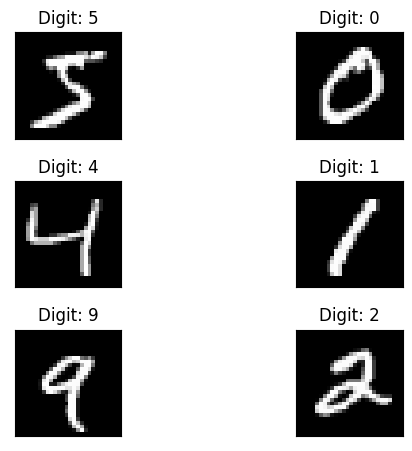

In [12]:
tf.random.set_seed(1234)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

fig = plt.figure()
for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

plt.show()

n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)


## Setup a model with an input layer that transforms the 28 by 28 input to a flattened vector of 784 features, a ReLU-activated dense layer with 32 hidden neurons, and a softmax-activated output layer with 10 neurons (1 for each class).
## Train this model on the training data for five epochs with an Adam optimizer, categorical cross-entropy as loss function, and accuracy as a metric. What is the training and testing accuracy of this setup?


In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train,
          epochs=5,
          verbose=2,
          validation_data=(X_test, Y_test)
)

scores_train = model.evaluate(X_train, Y_train)
scores_test = model.evaluate(X_test, Y_test)

print("Accuracy for train set ", scores_train[1]*100)
print("Accuracy for test set ", scores_test[1]*100)

Epoch 1/5
1875/1875 - 7s - loss: 0.3563 - accuracy: 0.9008 - val_loss: 0.2101 - val_accuracy: 0.9385 - 7s/epoch - 4ms/step
Epoch 2/5
1875/1875 - 3s - loss: 0.1850 - accuracy: 0.9471 - val_loss: 0.1523 - val_accuracy: 0.9558 - 3s/epoch - 2ms/step
Epoch 3/5
1875/1875 - 3s - loss: 0.1407 - accuracy: 0.9588 - val_loss: 0.1268 - val_accuracy: 0.9631 - 3s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 3s - loss: 0.1164 - accuracy: 0.9656 - val_loss: 0.1181 - val_accuracy: 0.9659 - 3s/epoch - 2ms/step
Epoch 5/5
1875/1875 - 3s - loss: 0.1009 - accuracy: 0.9698 - val_loss: 0.1108 - val_accuracy: 0.9691 - 3s/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step - loss: 0.1108 - accuracy: 0.9691
Accuracy for train set  97.5683331489563
Accuracy for test set  96.90999984741211


## Try to improve the model by replacing the hidden layer with three ReLU-activated layers of 256, 128, and 64 neurons.
## What is the training and testing accuracy of this setup? What are advantages and disadvantages of a deeper model?

In [14]:
model_new = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_new.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history_new = model_new.fit(X_train, Y_train,
          epochs=5,
          verbose=2,
          validation_data=(X_test, Y_test)
)

scores_train_new = model_new.evaluate(X_train, Y_train)
scores_test_new = model_new.evaluate(X_test, Y_test)

print("Accuracy for train set for deep model ", scores_train_new[1]*100)
print("Accuracy for test set for deep model ", scores_test_new[1]*100)

Epoch 1/5
1875/1875 - 6s - loss: 0.2072 - accuracy: 0.9377 - val_loss: 0.1269 - val_accuracy: 0.9608 - 6s/epoch - 3ms/step
Epoch 2/5
1875/1875 - 6s - loss: 0.0898 - accuracy: 0.9727 - val_loss: 0.0767 - val_accuracy: 0.9774 - 6s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 6s - loss: 0.0642 - accuracy: 0.9796 - val_loss: 0.0849 - val_accuracy: 0.9755 - 6s/epoch - 3ms/step
Epoch 4/5
1875/1875 - 6s - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0808 - val_accuracy: 0.9772 - 6s/epoch - 3ms/step
Epoch 5/5
1875/1875 - 5s - loss: 0.0422 - accuracy: 0.9859 - val_loss: 0.0949 - val_accuracy: 0.9754 - 5s/epoch - 3ms/step
313/313 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9754
Accuracy for train set for deep model  98.82333278656006
Accuracy for test set for deep model  97.53999710083008


Deeper model can have slower training process and it works only with large amounts of data, but generally in outperforms the simple ANN if enogh data is available.


## Visualize the training curves of accuracy and cross-entropy of both models from before in a single diagram. Compare the curves.

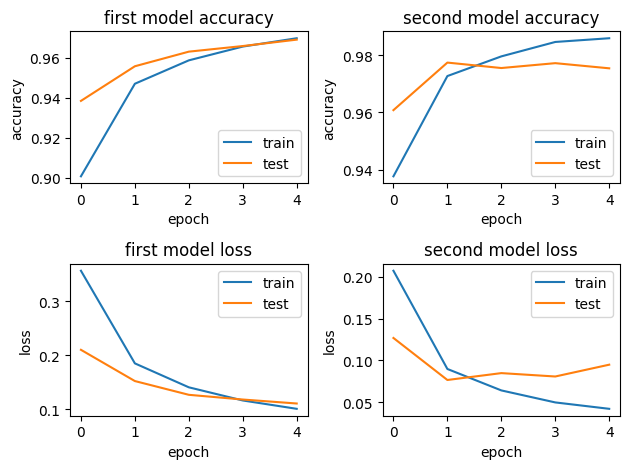

In [16]:
fig = plt.figure()
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('first model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])


plt.subplot(2,2,2)
plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.title('second model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('first model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

plt.subplot(2,2,4)
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.title('second model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

plt.tight_layout()

plt.show()